# SME0828 - Introdução à Ciência de Dados - Marcus Vinicius da Silva NUSP: 13833150

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings

In [2]:
path = '/home/marcussilva/Downloads/data/data/'

dt1 = pd.read_csv(path + 'BostonHousing.csv')

## Questão 1

In [3]:
dt1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
def data(dt1):
  #### Preparando os dados e separando em treino e teste ####

  dt1 = dt1.to_numpy()
  nrow,ncol = dt1.shape

  y = dt1[:,-1]
  x = dt1[:,0:ncol-1]

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

  return x_train, y_train, x_test, y_test

### Regressão Linear Múltipla

In [5]:
x_train, y_train, x_test, y_test = data(dt1)

lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

scoreL = r2_score(y_test, y_pred)
print(f'R2 score {np.around(scoreL,2)}')

R2 score 0.71


### Regressão Ridge

In [6]:
x_train, y_train, x_test, y_test = data(dt1)

rdg = Ridge(alpha = 0)
rdg.fit(x_train, y_train)

y_pred = rdg.predict(x_test)
scoreR = r2_score(y_test, y_pred)

print(f'R2 score {np.around(scoreR, 2)}')

R2 score 0.71


In [7]:
x_train, y_train, x_test, y_test = data(dt1)

vR2 = []
valpha = []

for i in np.arange(0, 100, 5):
  rdg = Ridge(alpha = i)
  rdg.fit(x_train, y_train)
  y_pred = rdg.predict(x_test)
  scoreR = r2_score(y_test, y_pred)

  vR2.append(scoreR)
  valpha.append(i)

dt = pd.DataFrame({
    'R2': vR2,
    'Alpha': valpha
})

fig = px.line(dt, x = 'Alpha', y = 'R2', markers=True,
              labels={'alpha': 'Valor de alpha', 'R2': 'Valor do coeficiente R2'},
              title='Regressão Ridge para o dataset Boston Housing')

fig.show()

### Regressão Lasso

In [8]:
x_train, y_train, x_test, y_test = data(dt1)

lasso = Lasso(alpha = 1, max_iter = 100)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

scoreLs = r2_score(y_test, y_pred)

print(f'R2 score {np.around(scoreLs,2)}')

R2 score 0.66


In [9]:
x_train, y_train, x_test, y_test = data(dt1)

vR2 = []
valpha = []

for i in np.arange(1, 100, 10):
  lasso = Lasso(alpha = i, max_iter= 1000)
  lasso.fit(x_train, y_train)
  y_pred = lasso.predict(x_test)

  scoreLs = r2_score(y_test, y_pred)

  vR2.append(scoreLs)
  valpha.append(i)

dt = pd.DataFrame({
    'R2': vR2,
    'Alpha': valpha
})

fig = px.line(dt, x = 'Alpha', y = 'R2', markers=True,
              labels={'alpha': 'Valor de alpha', 'R2': 'Valor do coeficiente R2'},
              title='Regressão Lasso para o dataset Boston Housing')

fig.show()

## Questão 2

In [10]:
x_train, y_train, x_test, y_test = data(dt1)

lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)

print(dt1.columns.to_list())
print(lasso.coef_)

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
[-0.09191567  0.03466685 -0.          0.         -0.          1.28131738
  0.01143974 -0.61602099  0.19150077 -0.00954028 -0.70335005  0.01083224
 -0.77992069]


#### Observando os resultados obtidos no código é possível dizer que as variáveis as quais mais influenciam são "rm" e "medv"

## Questão 3

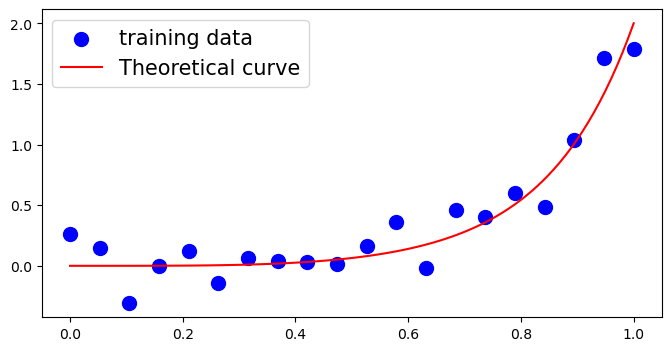

In [11]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(10)

#função para gerar os dados
def function(x):
  y = x**4 + x**9
  return y

# training set
N_train = 20
sigma = 0.2

x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, label="training data")

# test set
N_test = 20
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) + np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Curva teorica
xt = np.linspace(0,1,100)
yt = function(xt)

plt.plot(xt,yt, '-r', label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

In [12]:
degrees = range(1, 15)  # Graus polinomiais de 1 a 14
alpha = 0.01  # Força da regularização

train_errors = []
cv_errors = []

for degree in degrees:
    # Criar um pipeline que inclui a transformação polinomial e a regressão Ridge
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))

    # Ajustar o modelo nos dados de treinamento
    model.fit(x_train, y_train)

    # Previsões no conjunto de treinamento
    y_train_pred = model.predict(x_train)
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)

    # Validação cruzada (5-fold)
    cv_score = -cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    cv_errors.append(cv_score)


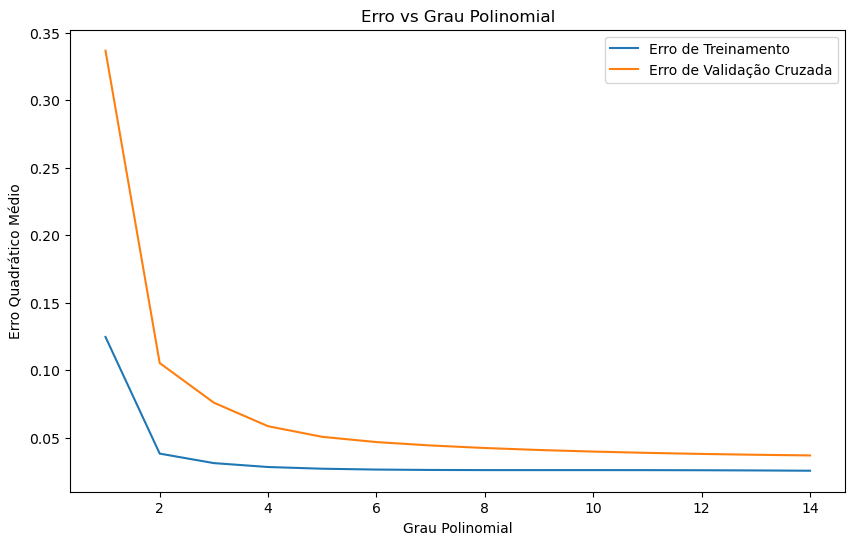

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Erro de Treinamento')
plt.plot(degrees, cv_errors, label='Erro de Validação Cruzada')
plt.xlabel('Grau Polinomial')
plt.ylabel('Erro Quadrático Médio')
plt.legend()
plt.title('Erro vs Grau Polinomial')
plt.show()


Grau polinomial ótimo: 14
Erro Quadrático Médio no Teste: 0.0493


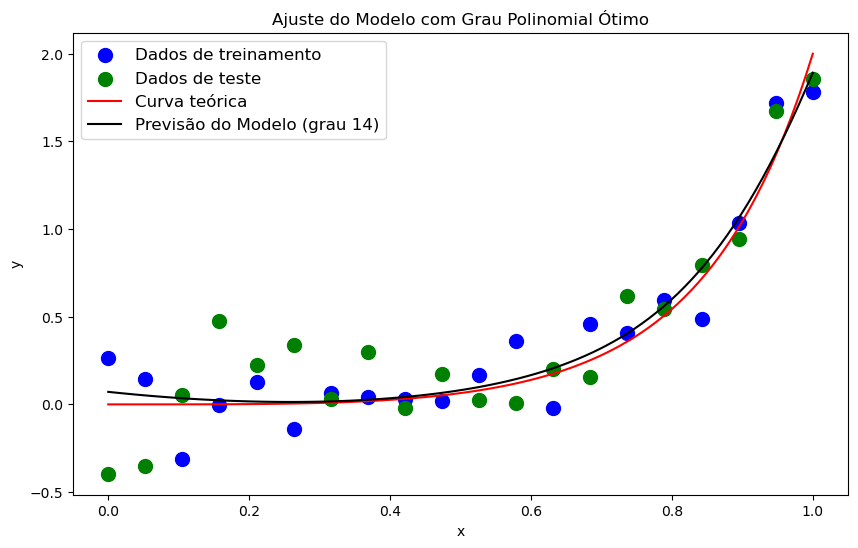

In [14]:
optimal_degree = degrees[np.argmin(cv_errors)]
print(f'Grau polinomial ótimo: {optimal_degree}')

# Ajustar o modelo com o grau ótimo
model = make_pipeline(PolynomialFeatures(optimal_degree), Ridge(alpha=alpha))
model.fit(x_train, y_train)

# Previsões no conjunto de teste
y_test_pred = model.predict(x_test)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Erro Quadrático Médio no Teste: {test_error:.4f}')

# Previsões para plotar a curva ajustada
y_xt_pred = model.predict(xt.reshape(-1, 1))

# Plotar o ajuste do modelo
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, label="Dados de treinamento")
plt.scatter(x_test, y_test, facecolor="green", edgecolor="g", s=100, label="Dados de teste")
plt.plot(xt, yt, '-r', label="Curva teórica")
plt.plot(xt, y_xt_pred, '-k', label=f"Previsão do Modelo (grau {optimal_degree})")
plt.legend(fontsize=12)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste do Modelo com Grau Polinomial Ótimo')
plt.show()


## Questão 4

In [15]:
warnings.filterwarnings("ignore", category=UserWarning)

dt2 = pd.read_csv(path + 'Vehicle.csv')

X = dt2.drop('Class', axis=1)
y = dt2['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic = LogisticRegression(max_iter=10000, solver='liblinear')

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search_lr = GridSearchCV(logistic, param_grid_lr, cv=10, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

print(f'Melhores parâmetros para Regressão Logística: {grid_search_lr.best_params_}')
print(f'Melhor acurácia com Regressão Logística: {np.around(grid_search_lr.best_score_, 2)}')

print(f'Melhores parâmetros para KNN: {grid_search_knn.best_params_}')
print(f'Melhor acurácia com KNN: {np.around(grid_search_knn.best_score_, 2)}')

best_lr = grid_search_lr.best_estimator_
best_knn = grid_search_knn.best_estimator_

y_pred_lr = best_lr.predict(X_test)
y_pred_knn = best_knn.predict(X_test)

print(f'Acurácia Regressão Logística: {np.around(accuracy_score(y_test, y_pred_lr), 2)}')
print(f'Acurácia KNN: {np.around(accuracy_score(y_test, y_pred_knn), 2)}')

Melhores parâmetros para Regressão Logística: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Melhor acurácia com Regressão Logística: 0.79
Melhores parâmetros para KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Melhor acurácia com KNN: 0.71
Acurácia Regressão Logística: 0.8
Acurácia KNN: 0.71


## Questão 5

In [19]:
warnings.filterwarnings("ignore", category=UserWarning)

#### Preparando os dados ####
dt3 = pd.read_csv(path + 'winequality-red.csv')

X = dt3.drop('quality', axis=1)  # Features
y = dt3['quality']               # Target (rótulo)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Aplicando a regressão Logística ####
logistic = LogisticRegression(max_iter=10000, solver='liblinear')

folds = [3, 5, 7, 10]  # Diferentes números de folds
results = {'folds': [], 'accuracy_mean': [], 'accuracy_std': []}

for fold in folds:
    scores = cross_val_score(logistic, X_scaled, y, cv=fold, scoring='accuracy')
    results['folds'].append(fold)
    results['accuracy_mean'].append(np.mean(scores))
    results['accuracy_std'].append(np.std(scores))


results_df = pd.DataFrame(results)

fig = px.bar(results_df, x='folds', y='accuracy_mean', error_y='accuracy_std', 
             title='Acurácia Média para Diferentes Números de Folds',
             labels={'folds': 'Número de Folds', 'accuracy_mean': 'Acurácia Média'},
             text='accuracy_mean')

fig.show()